In [2]:
import  matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [3]:
image = cv2.imread("replace_blue_screen.jpg")

print(f"The following image has the following properties {image.shape}")

The following image has the following properties (514, 816, 3)


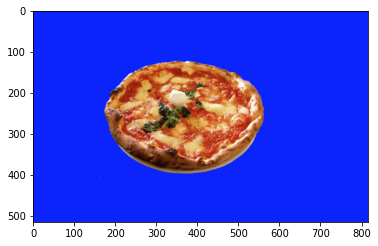

In [4]:
image_copy = np.copy(image)

# CV2 reads RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

In [5]:
# Threshold for detecting blues in the image 
# Iterrative process and can chaange results are bad
lower_blue = np.array([0, 0, 220])
high_blue = np.array([50, 50, 255])

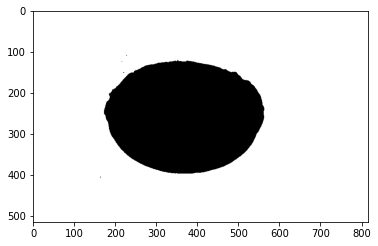

In [6]:
# Mask parameters
mask = cv2.inRange(image_copy, lower_blue, high_blue)

# Visualizing the mask
plt.imshow(mask, cmap="gray")

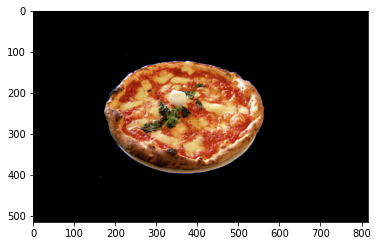

In [7]:
masked_img = np.copy(image_copy)

masked_img[mask != 0] = [0,0,0]

plt.imshow(masked_img)

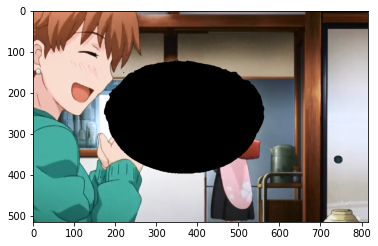

In [10]:
#Load bg img and covert to rgb
image_bg = cv2.imread("yum_bg.jpg")
image_bg = cv2.cvtColor(image_bg, cv2.COLOR_BGR2RGB)

#Crop it to the right side
crop_image_bg = image_bg[100:614, 400:1216]

#Mask the cropped bg to exclude pizza area
crop_image_bg[mask == 0] = [0, 0, 0]

#Display the bg
plt.imshow(crop_image_bg)

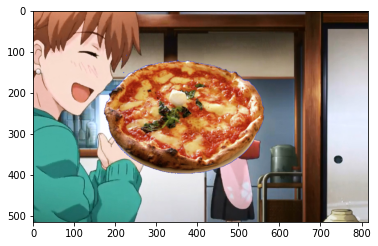

In [11]:
#combine all
final_img = crop_image_bg + masked_img

plt.imshow(final_img)